In [2]:
!pip install missingno==0.5.2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
import missingno as msno
sns.set_theme(style="whitegrid")
%matplotlib inline 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
cuaca = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/auto_weather_stat/id-03/data.json")
geomagnetik = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/geomagnetic_stat/id-01/data.json")

In [4]:
cuacaT=cuaca.transpose()
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1729562564,26.08,77.14,1013.77,30.54,1.729563e+09,4.13
1729562624,26.09,77.28,1013.73,30.52,1.729563e+09,4.13
1729562684,26.21,77.66,1013.74,30.56,1.729563e+09,4.12
1729562744,26.20,77.54,1013.76,30.57,1.729563e+09,4.13
1729562804,26.33,77.80,1013.76,30.65,1.729563e+09,4.13
1729562864,26.13,76.78,1013.72,30.67,1.729563e+09,4.12
1729562924,26.18,76.90,1013.76,30.70,1.729563e+09,4.12
1729562984,25.99,76.14,1013.67,30.68,1.729563e+09,4.12
1729563044,25.97,75.90,1013.69,30.71,1.729563e+09,4.13
1729563104,26.04,76.37,1013.64,30.68,1.729563e+09,4.13


In [5]:
cuacaT.describe()

,dew,humidity,pressure,temperature,timestamp,volt
count,441031.000000,441032.000000,441032.000000,441032.000000,4.410320e+05,441032.000000
mean,25.026383,85.585351,1008.892831,27.852377,1.716005e+09,4.090742
std,1.498018,11.098672,51.168858,3.261647,8.279079e+06,0.031064
min,17.670000,0.000000,-9.050000,0.020000,0.000000e+00,0.000000
25%,24.160000,76.780000,1010.220000,25.440000,1.709111e+09,4.070000
50%,25.120000,89.930000,1011.510000,26.990000,1.716093e+09,4.090000
75%,26.060000,94.640000,1012.780000,30.330000,1.722807e+09,4.120000
max,29.700000,99.580000,1016.530000,41.120000,1.729563e+09,4.170000


In [6]:
cuacaT['timestamp']= cuacaT['timestamp'].astype(int)
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1729562564,26.08,77.14,1013.77,30.54,1729562564,4.13
1729562624,26.09,77.28,1013.73,30.52,1729562624,4.13
1729562684,26.21,77.66,1013.74,30.56,1729562684,4.12
1729562744,26.20,77.54,1013.76,30.57,1729562744,4.13
1729562804,26.33,77.80,1013.76,30.65,1729562804,4.13
1729562864,26.13,76.78,1013.72,30.67,1729562864,4.12
1729562924,26.18,76.90,1013.76,30.70,1729562924,4.12
1729562984,25.99,76.14,1013.67,30.68,1729562984,4.12
1729563044,25.97,75.90,1013.69,30.71,1729563044,4.13
1729563104,26.04,76.37,1013.64,30.68,1729563104,4.13


In [7]:
# Menampilkan 10 data terakhir
cuacaT.head(10)

,dew,humidity,pressure,temperature,timestamp,volt
0,22.62,89.33,1011.29,24.49,0,4.06
1702296831,23.29,89.28,1010.72,25.18,1702296831,4.08
1702296891,23.29,89.38,1010.75,25.16,1702296891,4.08
1702296951,23.31,89.58,1010.76,25.14,1702296951,4.08
1702297011,23.35,89.86,1010.82,25.13,1702297011,4.08
1702297071,23.32,89.85,1010.82,25.10,1702297071,4.08
1702297131,23.29,89.81,1010.85,25.08,1702297131,4.08
1702297190,23.27,89.87,1010.84,25.05,1702297190,4.08
1702297251,23.26,89.88,1010.88,25.04,1702297251,4.09
1702297311,23.26,90.00,1010.86,25.02,1702297311,4.08


In [8]:
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1729562564,26.08,77.14,1013.77,30.54,1729562564,4.13
1729562624,26.09,77.28,1013.73,30.52,1729562624,4.13
1729562684,26.21,77.66,1013.74,30.56,1729562684,4.12
1729562744,26.20,77.54,1013.76,30.57,1729562744,4.13
1729562804,26.33,77.80,1013.76,30.65,1729562804,4.13
1729562864,26.13,76.78,1013.72,30.67,1729562864,4.12
1729562924,26.18,76.90,1013.76,30.70,1729562924,4.12
1729562984,25.99,76.14,1013.67,30.68,1729562984,4.12
1729563044,25.97,75.90,1013.69,30.71,1729563044,4.13
1729563104,26.04,76.37,1013.64,30.68,1729563104,4.13


In [9]:
# Tentukan batas bawah dan batas atas waktu yang wajar dalam format UNIX
start_timestamp = pd.Timestamp('2020-01-01').timestamp()  # UNIX time untuk 1 Januari 2020
end_timestamp = pd.Timestamp.now().timestamp()  # UNIX time saat ini

# Hapus data dengan timestamp di luar rentang waktu yang wajar
cuacaT = cuacaT[(cuacaT['timestamp'] >= start_timestamp) & (cuacaT['timestamp'] <= end_timestamp)]

In [10]:
# Konversi timestamp ke datetime dalam format UTC
cuacaT['timestamp'] = pd.to_datetime(cuacaT['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuacaT['timestamp'] = cuacaT['timestamp'].dt.tz_convert('Asia/Jakarta')

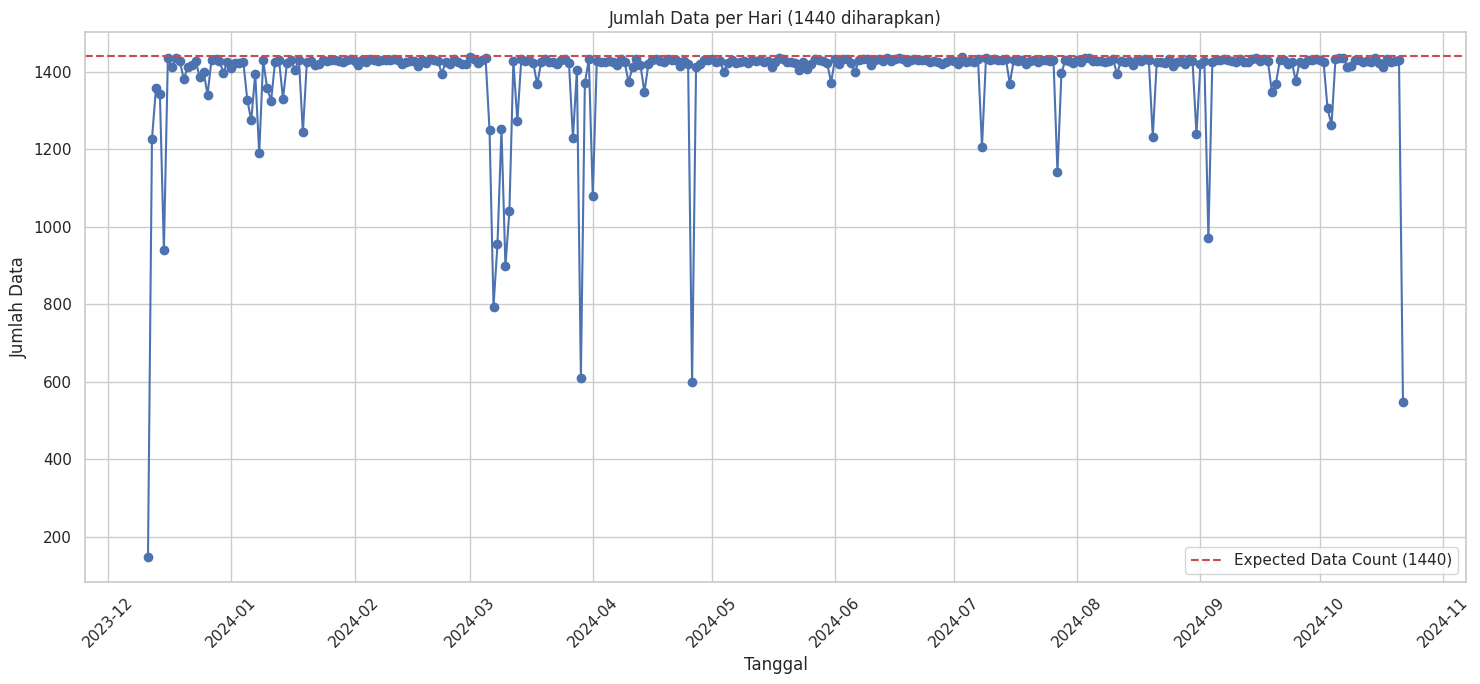

Hari dengan jumlah data yang kurang dari 1440:
           date  count
0    2023-12-11    148
1    2023-12-12   1226
2    2023-12-13   1357
3    2023-12-14   1343
4    2023-12-15    939
..          ...    ...
312  2024-10-18   1433
313  2024-10-19   1424
314  2024-10-20   1428
315  2024-10-21   1429
316  2024-10-22    548

[317 rows x 2 columns]


In [11]:

# Mengelompokkan data berdasarkan hari
cuacaT['date'] = cuacaT['timestamp'].dt.date
data_per_day = cuacaT.groupby('date').size().reset_index(name='count')

# Visualisasi jumlah data per hari
plt.figure(figsize=(15, 7))
plt.plot(data_per_day['date'], data_per_day['count'], marker='o', linestyle='-')
plt.axhline(y=1440, color='r', linestyle='--', label='Expected Data Count (1440)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Hari (1440 diharapkan)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Menampilkan hari-hari yang tidak memenuhi 1440 data
days_with_missing_data = data_per_day[data_per_day['count'] != 1440]
print("Hari dengan jumlah data yang kurang dari 1440:")
print(days_with_missing_data)

In [12]:
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt,date
1729562564,26.08,77.14,1013.77,30.54,2024-10-22 09:02:44+07:00,4.13,2024-10-22
1729562624,26.09,77.28,1013.73,30.52,2024-10-22 09:03:44+07:00,4.13,2024-10-22
1729562684,26.21,77.66,1013.74,30.56,2024-10-22 09:04:44+07:00,4.12,2024-10-22
1729562744,26.20,77.54,1013.76,30.57,2024-10-22 09:05:44+07:00,4.13,2024-10-22
1729562804,26.33,77.80,1013.76,30.65,2024-10-22 09:06:44+07:00,4.13,2024-10-22
1729562864,26.13,76.78,1013.72,30.67,2024-10-22 09:07:44+07:00,4.12,2024-10-22
1729562924,26.18,76.90,1013.76,30.70,2024-10-22 09:08:44+07:00,4.12,2024-10-22
1729562984,25.99,76.14,1013.67,30.68,2024-10-22 09:09:44+07:00,4.12,2024-10-22
1729563044,25.97,75.90,1013.69,30.71,2024-10-22 09:10:44+07:00,4.13,2024-10-22
1729563104,26.04,76.37,1013.64,30.68,2024-10-22 09:11:44+07:00,4.13,2024-10-22


In [13]:
# Simpan DataFrame 'cuacaT' ke file CSV bernama 'Cuaca.csv'
cuacaT.to_csv(
#cuacaT.tail(43200).to_csv(
    'cuaca.csv', 
    sep=',',
    index=False,
    index_label='timestamp'
)

In [14]:
datacuaca = pd.read_csv("/work/cuaca.csv")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>